# Importing All required libraries

In [6]:
# enabling plot
%matplotlib inline
# !conda install --yes numpy


# importing audio playback widget
import IPython.display

import numpy as np
import scipy
# import mir_eval

In [76]:
import tensorflow as tf

In [7]:
# Librosa for audio
import librosa
# And the display module for visualization
import librosa.display

# Speach recognizer
# import speech_recognition as sr

In [11]:
# Plot libraries
import matplotlib.pyplot as plt

# seaborn making prettier plot
import seaborn
seaborn.set(style='ticks')


# User voice record, store and play 

In [1]:
# Importing PyAudio to receive user voice
import pyaudio
import wave

In [2]:
CHUNK = 1024
FORMAT = pyaudio.paInt16
CHANNELS = 2
RATE = 44100
RECORD_SECONDS = 5
WAVE_OUTPUT_FILENAME = "output.wav"

In [3]:
# Recording voice

p = pyaudio.PyAudio()
stream = p.open(format=FORMAT,
                channels=CHANNELS,
                rate=RATE,
                input=True,
                frames_per_buffer=CHUNK)
print("* recording started.  You have 5 seconds to record")
frames = []
for i in range(0, int(RATE / CHUNK * RECORD_SECONDS)):
    data = stream.read(CHUNK)
    frames.append(data)

print("* Successfully recording is completed")


stream.stop_stream()
stream.close()
p.terminate()

* recording started.  You have 5 seconds to record
* Successfully recording is completed


In [4]:
# storing file

wf = wave.open(WAVE_OUTPUT_FILENAME, 'wb')
wf.setnchannels(CHANNELS)
wf.setsampwidth(p.get_sample_size(FORMAT))
wf.setframerate(RATE)
wf.writeframes(b''.join(frames))
wf.close()
print("Your audio has been saved")

Your audio has been saved


In [8]:
# user voice loading
filename = 'output.wav'
y, sr = librosa.load(filename)
print(y.shape, sr)

# Play it back!
IPython.display.Audio(data=y, rate=sr)

(110080,) 22050


In [106]:
pitches, magnitudes = librosa.piptrack(y=y, sr=sr)
l = len(pitches)
print(l)
me = np.average(pitches)
print(me/l)





1025
0.027510448548851943


# Voice features

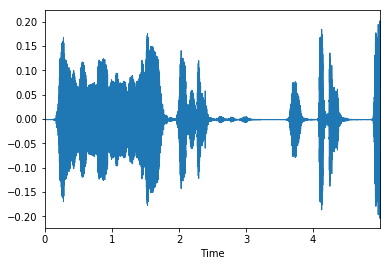

In [9]:
# Display module waveform
librosa.display.waveplot(y,sr)

In [108]:
# Short-time Fourier Transform
D = librosa.stft(y)
# print(D)
# for i in D:
#     print(i)
#     print("finished")

C:\Users\dahal\Anaconda3\lib\site-packages\librosa\core\spectrum.py:983: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  warnings.warn('amplitude_to_db was called on complex input so phase '


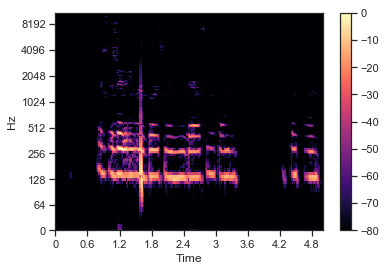

In [109]:
log_power = librosa.amplitude_to_db(D**2, ref=np.max)

librosa.display.specshow(log_power, x_axis='time', y_axis='linear' )

# Plot of log_power
librosa.display.specshow(log_power, x_axis='time', y_axis='log')
plt.colorbar();

C:\Users\dahal\Anaconda3\lib\site-packages\librosa\core\spectrum.py:983: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  warnings.warn('amplitude_to_db was called on complex input so phase '


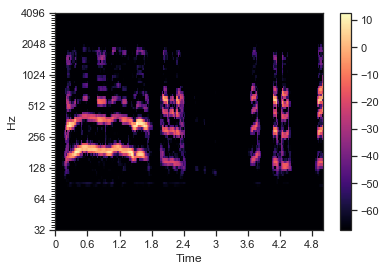

In [17]:
# Constant-Q trasnform (CQT)
c = librosa.cqt(y,sr)

librosa.display.specshow(librosa.amplitude_to_db(c**2), x_axis='time', y_axis='cqt_hz')
plt.colorbar();

12


C:\Users\dahal\Anaconda3\lib\site-packages\librosa\display.py:696: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  warnings.warn('Trying to display complex-valued input. '


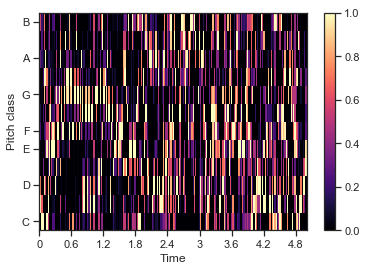

In [18]:
#Energy
chroma = librosa.feature.chroma_cqt(C=c, sr=sr)
print(len(chroma))
librosa.display.specshow(chroma, x_axis='time', y_axis='chroma')
plt.colorbar();

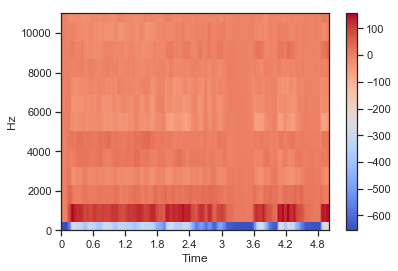

In [16]:
# mfcc
MFCC = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
librosa.display.specshow(MFCC, x_axis='time', y_axis='hz')
plt.colorbar()

In [122]:
# for i in MFCC:
#     print (i)
#     print(" \n ")

In [104]:
librosa.feature.rmse(y=y)
S, phase = librosa.magphase(librosa.stft(y))
rms = librosa.feature.rmse(S=S)


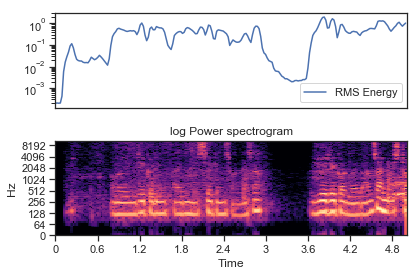

In [26]:
plt.subplot(2, 1, 1)
plt.semilogy(rms.T, label='RMS Energy')
plt.xticks([])
plt.xlim([0, rms.shape[-1]])
plt.legend(loc='best')
plt.subplot(2, 1, 2)
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),y_axis='log', x_axis='time')
plt.title('log Power spectrogram')
plt.tight_layout()

In [27]:
# test
# h = sr.AudioFile('output.m4a')
# print(h)    

# with harvard as source:
#     audio = r.record(source)

# Extra thing as a back up

In [28]:
# How about separating harmonic and percussive components?
y_h, y_p = librosa.effects.hpss(y) 

In [29]:
# Play the harmonic component
IPython.display.Audio(data=y_h, rate=sr)

In [30]:
# Pitch shifting?  Let's gear-shift by a major third (4 semitones)
y_shift = librosa.effects.pitch_shift(y, sr, 7)

IPython.display.Audio(data=y_shift, rate=sr)

In [31]:
# Or time-stretching?  Let's slow it down
y_slow = librosa.effects.time_stretch(y, 0.5)

IPython.display.Audio(data=y_slow, rate=sr)